In [1]:
from array import array
import math

# Keplerian Motion

The great physicist, Johannes Kepler, discovered that the planets orbit the Sun in elliptical orbits.  The Sun is located at one of the foci of the ellipse.  The eccentricity of the ellipse is given by the formula:

$$e = \sqrt{1-\frac{b^2}{a^2}}$$

where $a$ is the semi-major axis and $b$ is the semi-minor axis.  The distance from the centre of the ellipse to the focus is given by the formula:

$$f = \sqrt{a^2-b^2}$$

The orbit of the Earth around the Sun is almost circular with an eccentricity of $e = 0.0167$.  The orbit of Halley's Comet is highly elliptical with an eccentricity of $e = 0.967$.

The equations of motion for a particle in an elliptical orbit are given by:

$$\frac{d^2x}{dt^2} = -\frac{GMx}{r^3}$$
$$\frac{d^2y}{dt^2} = -\frac{GMy}{r^3}$$

where $r = \sqrt{x^2+y^2}$ and $G$ is the gravitational constant.  The initial conditions for the position and velocity of the particle are given by:

$$x(0) = a+f$$
$$y(0) = 0$$

$$v_x(0) = 0$$
$$v_y(0) = \sqrt{\frac{GM}{a}}$$

where $a$ is the semi-major axis of the ellipse.

# Circular Orbit

The simplest case of an elliptical orbit is a circular orbit.  In this case, the semi-major axis is equal to the semi-minor axis, so the eccentricity is zero.  The equations of motion for a circular orbit are given by:

$$\frac{d^2x}{dt^2} = -\frac{GMx}{r^3}$$
$$\frac{d^2y}{dt^2} = -\frac{GMy}{r^3}$$

where $r = \sqrt{x^2+y^2}$ and $G$ is the gravitational constant.  The initial conditions for the position and velocity of the particle are given by:

$$x(0) = r_0$$
$$y(0) = 0$$
$$v_x(0) = 0$$
$$v_y(0) = \sqrt{\frac{GM}{r_0}}$$

where $r_0$ is the radius of the circular orbit.

For planetary motion, a common system of units is one where distances are measured in astronomical units (1 A.U. = 
$1.496 \times 10^{11}$ m) and time is measured in years (1 year = $3.156 \times 10^7$ s).  In SI units, the gravitational constant is given by:

$$G = 6.674 \times 10^{-11} \frac{m^3}{kg \cdot s^2}$$

The mass of the Sun is given by:

$$M = 1.989 \times 10^{30} kg$$

And thus the gravitational constant times the mass of the Sun is given by:

$$GM = 1.32712442099 \times 10^{20} \frac{m^3}{s^2}$$

Converting to astronomical units and years, the gravitational constant times the mass of the Sun is given by:

$$GM = 1.32712442099 \times 10^{20} \frac{m^3}{s^2} \times \frac{1}{(1.496 \times 10^{11} m)^3} \times \frac{(3.156 \times 10^7 s)^2}{1 year} = 4 \pi^2$$

Assuming the earth's orbit to be circular, the radius of the earth's orbit is given by:

$$r_0 = 1 A.U. = 1.496 \times 10^{11} m$$

and the initial velocity will be:

$$v_0 = \sqrt{\frac{GM}{r_0}} = \sqrt{\frac{4 \pi^2}{1}} = 2 \pi$$

In [2]:
# Circular Orbit of radius 1 for testing
#
#r0 = 1.0
#v0 = 2.0*math.pi
#
# Earth - circular with zero eccentricity
semi_major = 1.0
eccentricity = 0.0
# Jupiter - circular with zero eccentricity
semi_majorj = 5.2
eccentricityj = 0.0
# Io - circular with zero eccentricity
semi_majori = 0.00282
eccentricityi = 0.0
#
# Halley's Comet
#
#semi_major = 17.834
#eccentricity = 0.967

period_jupiter = 11.86 # years
n_orbits_theory = 1/period_jupiter + 1
# This will be one orbit plus the extra time to get to 
# the same point in the orbit where earth, jupiter, 
# and the sun are aligned

n_orbits = n_orbits_theory # number of orbits to calculate
tau = 1.0/365.25/10000.0 # time step (in years)

# 0.0001 days is about 8.6 seconds ... given the expected 
# time difference of 1.8 minutes, this should be sufficient 
# ... maybe?

nStep = int(n_orbits/tau) # number of steps to calculate

method = 3 
# 1 = Euler, 2 = Euler-Cromer, 
# 3 = Runge-Kutta, 4 = Adaptive Runge-Kutta
# We need Runge-Kutta for this to work for periods 
# of 1 year or more

# Everything below this point is calculated.
semi_minor = semi_major*math.sqrt(1-eccentricity*eccentricity)
semi_minorj = semi_majorj*math.sqrt(1-eccentricityj*eccentricityj)
semi_minori = semi_majori*math.sqrt(1-eccentricityi*eccentricityi)

mass_Earth = 5.972E+24
mass_Jupiter = 1.898E+27
mass_Io = 8.9319E+22
mass_Sun = 1.989E+30

G = 6.674E-11

GMSIUnits = G*mass_Sun
GMSIUnitsj = G*mass_Sun
GMSIUnitsi = G*mass_Jupiter

SecondsInYear = 31556952
AUnit = 149597870700
GM = GMSIUnits/math.pow(AUnit,3)*math.pow(SecondsInYear,2)
GMj = GMSIUnitsj/math.pow(AUnit,3)*math.pow(SecondsInYear,2)
GMi = GMSIUnitsi/math.pow(AUnit,3)*math.pow(SecondsInYear,2)

F = math.sqrt((semi_major)**2-(semi_minor)**2)  # distance from centre of the ellipse to focus
Fj = math.sqrt((semi_majorj)**2-(semi_minorj)**2)  # distance from centre of the ellipse to focus
Fi = math.sqrt((semi_majori)**2-(semi_minori)**2)  # distance from centre of the ellipse to focus

r0 = semi_major+F
r0j = semi_majorj+Fj
r0i = semi_majori+Fi


v0 = math.sqrt(GM*(2/r0-1/semi_major))
v0j = math.sqrt(GMj*(2/r0j-1/semi_majorj))
v0i = math.sqrt(GMi*(2/r0i-1/semi_majori))

print("Initial Conditions, Earth:")
print("Semi-major axis = ", semi_major, "A.U.")
print("Semi-minor axis = ", semi_minor, "A.U.")
print("Focus = ", F, "A.U.")
print("GM = ", GM, "A.U.^3/year^2")
print("Initial radius = ", r0, "A.U.")
print("Initial velocity = ", v0, "A.U./year")
print("----------------------------------------")

print("Initial Conditions, Jupiter:")
print("Semi-major axis = ", semi_majorj, "A.U.")
print("Semi-minor axis = ", semi_minorj, "A.U.")
print("Focus = ", Fj, "A.U.")
print("GM = ", GMj, "A.U.^3/year^2")
print("Initial radius = ", r0j, "A.U.")
print("Initial velocity = ", v0j, "A.U./year")
print("----------------------------------------")

print("Initial Conditions, Io:")
print("Semi-major axis = ", semi_majori, "A.U.")
print("Semi-minor axis = ", semi_minori, "A.U.")
print("Focus = ", Fi, "A.U.")
print("GM = ", GMi, "A.U.^3/year^2")
print("Initial radius = ", r0i, "A.U.")
print("Initial velocity = ", v0i, "A.U./year")

mass = 1.0
massj = 1.0
massi = 1.0

Initial Conditions, Earth:
Semi-major axis =  1.0 A.U.
Semi-minor axis =  1.0 A.U.
Focus =  0.0 A.U.
GM =  39.48524597299331 A.U.^3/year^2
Initial radius =  1.0 A.U.
Initial velocity =  6.283728667995883 A.U./year
----------------------------------------
Initial Conditions, Jupiter:
Semi-major axis =  5.2 A.U.
Semi-minor axis =  5.2 A.U.
Focus =  0.0 A.U.
GM =  39.48524597299331 A.U.^3/year^2
Initial radius =  5.2 A.U.
Initial velocity =  2.7555973097076327 A.U./year
----------------------------------------
Initial Conditions, Io:
Semi-major axis =  0.00282 A.U.
Semi-minor axis =  0.00282 A.U.
Focus =  0.0 A.U.
GM =  0.03767873145135309 A.U.^3/year^2
Initial radius =  0.00282 A.U.
Initial velocity =  3.6553046778228846 A.U./year


In [3]:
import numpy as np
import matplotlib.pyplot as plt

0.00282 5.2 1.0
1296.2073325613064 0.5299225595591601 6.283728667995883


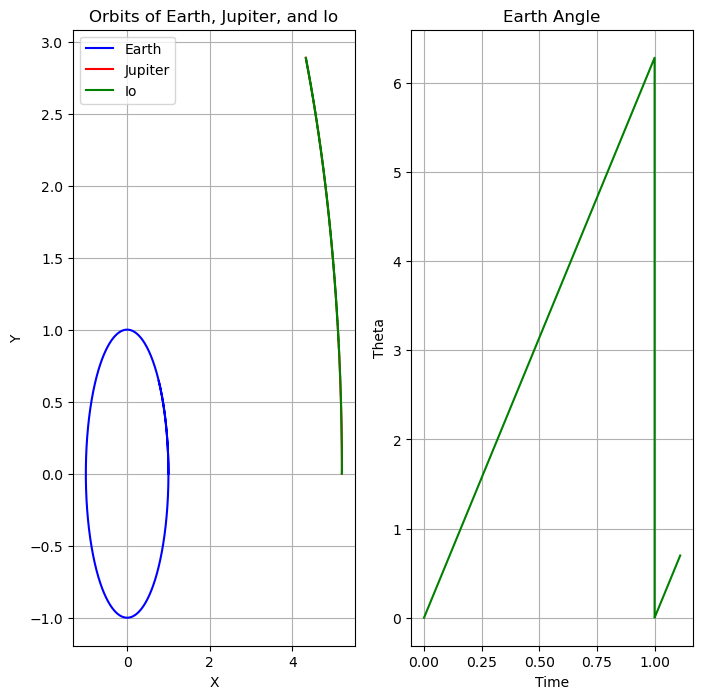

In [4]:
omega_i = np.sqrt(GMi/(r0i**3))
omega_j = np.sqrt(GMj/(r0j**3))
omega_e = np.sqrt(GM/(r0**3))

print(r0i, r0j, r0)
print(omega_i, omega_j, omega_e)

t = np.linspace(0, 1.111, 10000000)
xes = r0*np.cos(omega_e*t)
yes = r0*np.sin(omega_e*t)
xjs = r0j*np.cos(omega_j*t)
yjs = r0j*np.sin(omega_j*t)
xij = -r0i*np.cos(-omega_i*t)
yij = r0i*np.sin(-omega_i*t)

xis = xij + xjs
yis = yij + yjs

xie = xis - xes
yie = yis - yes

xje = xjs - xes
yje = yjs - yes

theta_ie = np.arctan(yie/xie)
theta_je = np.arctan(yje/xje)
theta_e = np.arctan(yes/xes)
for i in range(len(theta_e)):
    if xes[i] < 0 and yes[i] > 0:
        theta_e[i] = theta_e[i] + np.pi
    if xes[i] < 0 and yes[i] < 0:
        theta_e[i] = theta_e[i] + np.pi
    if xes[i] > 0 and yes[i] < 0:
        theta_e[i] = theta_e[i] + 2.0*np.pi

delta_theta = theta_ie - theta_je

# plot the orbits
fig, ax = plt.subplots(1,2,figsize=(8, 8))
ax[0].plot(xes,yes, linestyle='-', color='blue',label='Earth')
ax[0].plot(xjs,yjs, linestyle='-', color='red',label='Jupiter')
ax[0].plot(xis,yis, linestyle='-', color='green',label='Io')
ax[1].plot(t,theta_e, linestyle='-', color='green',label='Io')
ax[0].legend()
ax[0].set_title('Orbits of Earth, Jupiter, and Io')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].grid(True)
ax[1].set_title('Earth Angle')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Theta')
ax[1].grid(True)







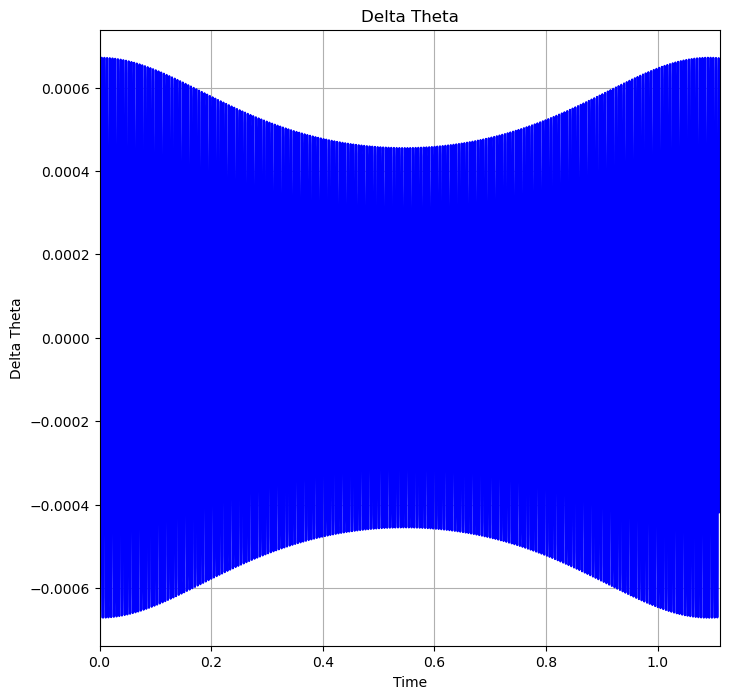

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(t, delta_theta, linestyle='-', color='blue',label='Io')
ax.set_title('Delta Theta')
ax.set_xlabel('Time')
ax.set_ylabel('Delta Theta')
ax.set_xlim(0, 1.111)
ax.grid(True)

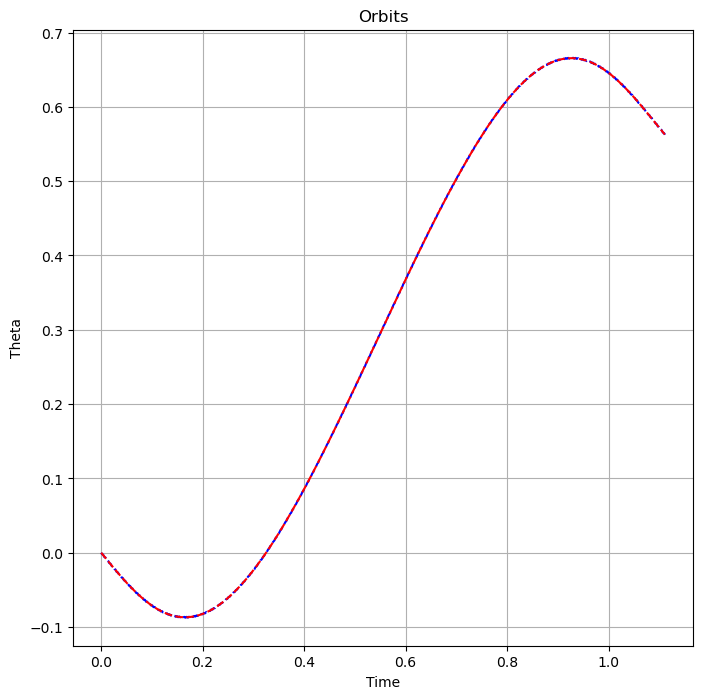

In [6]:
# plot the angle of Io and Jupiter, relative to earth

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(t, theta_ie, linestyle='--', color='blue',label='Earth')
ax.plot(t, theta_je, linestyle='--', color='red',label='Jupiter')

ax.set_title('Orbits')
ax.set_xlabel('Time')
ax.set_ylabel('Theta')
ax.grid(True)

In [7]:
# Calculate the periods
periods = []
time_periods = []
theta_periods = []
found = False
for i in range(len(delta_theta)-1):
    if delta_theta[i] < 0 and delta_theta[i+1] > 0:
        if found == False:
            found = True
            old_time = t[i]
        else:
            periods.append((t[i]-old_time)*365.25)
            time_periods.append(t[i])
            theta_periods.append(theta_e[i])
            old_time = t[i]
        
print(len(periods))
print(len(t))

average_period = np.mean(periods)
max_period = np.max(periods)

# Fine the time at which the period is a maximum
for i in range(len(periods)):
    if periods[i] == max_period:
        max_period_time = time_periods[i]
        max_period_theta = theta_periods[i]

print("Average period (in days) = ", average_period)
print("Max period (in days) = ", max_period)
print("Max period time (in years) = ", max_period_time)
print("Max period angle (in degrees) = ", max_period_theta*180.0/np.pi)

time_increase = max_period - average_period
print("Time increase (in minutes) = ", time_increase*24*60)



228
10000000
Average period (in days) =  1.7711997448587904
Max period (in days) =  1.7725029092503055
Max period time (in years) =  0.5843732819373282
Max period angle (in degrees) =  210.39257437096805
Time increase (in minutes) =  1.8765567237817748


Text(0.5, 0, 'Time')

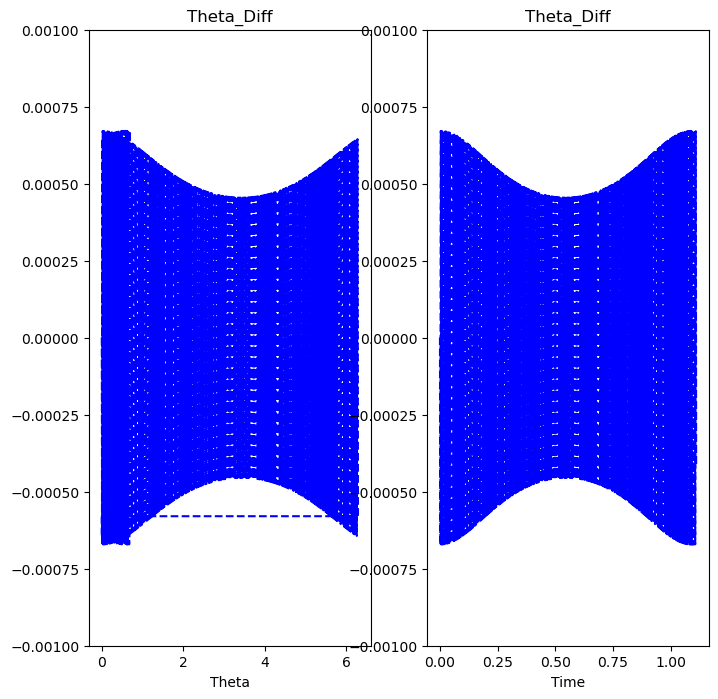

In [8]:
# plot theta_diff

fig, ax = plt.subplots(1,2,figsize=(8, 8))

ax[0].plot(theta_e, delta_theta, linestyle='--', color='blue',label='Io')
ax[0].set_title('Theta_Diff')
ax[0].set_ylim(-0.001, 0.001)
ax[0].set_xlabel('Theta')

ax[1].plot(t, delta_theta, linestyle='--', color='blue',label='Io')
ax[1].set_title('Theta_Diff')
ax[1].set_ylim(-0.001, 0.001)
ax[1].set_xlabel('Time')


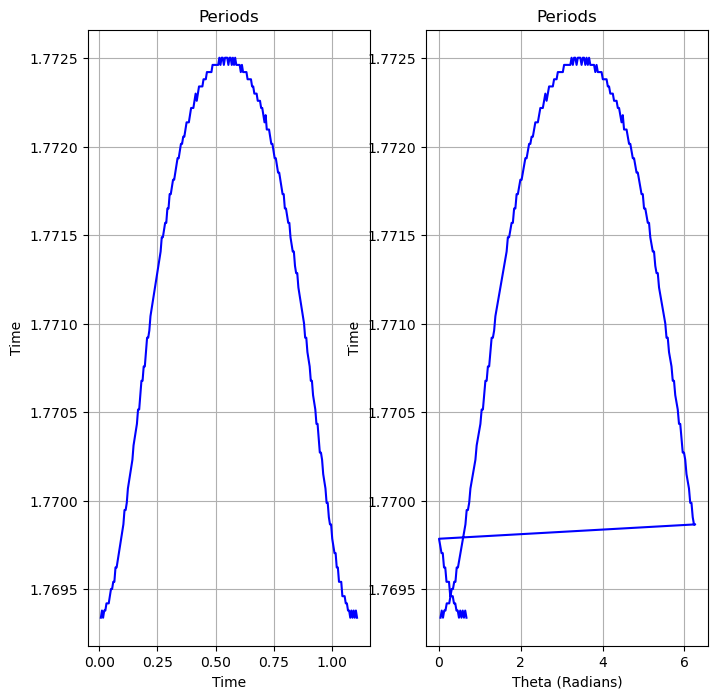

In [9]:
# plot the periods
fig, ax = plt.subplots(1,2,figsize=(8, 8))
ax[0].plot(time_periods,periods, linestyle='-', color='blue',label='Io')
ax[0].set_title('Periods')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(theta_periods,periods, linestyle='-', color='blue',label='Io')
ax[1].set_title('Periods')
ax[1].set_xlabel('Theta (Radians)')
ax[1].set_ylabel('Time')
ax[1].grid(True)